In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
import warnings

warnings.filterwarnings(action="ignore")
from scipy.stats import beta
from sklearn import neighbors, preprocessing  # 贝叶斯算法隶属naive_bayes
import sklearn.linear_model as LM
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, KFold  # 验证参数在model_selection中
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_curve  # 评估参数在metrics中
from sklearn import tree  # 决策树模拟
from sklearn.preprocessing import LabelEncoder, StandardScaler  # 对于分类型变量的数字化编码
from sklearn import ensemble #导入集成学习模型
import sklearn.neural_network as net
#引入网格搜索函数，与n折交叉误差，cv为几折
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
def SSE(Y, Y_): #和方差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + (Y[i] - Y_[i]) ** 2
        i += 1 
    return ram  

    
def MSE(Y, Y_): #平均方差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + (Y[i] - Y_[i]) ** 2
        i += 1 
    ram = ram/len(Y)
    return ram      
    
def RMSE(Y, Y_): #均方误差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + (Y[i] - Y_[i]) ** 2
        i += 1 
    ram = ram/len(Y)
    return np.sqrt(ram)
    
def MAE(Y, Y_): #平均绝对误差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + abs((Y[i] - Y_[i]))
        i += 1 
    return ram/len(Y)

In [3]:
import seaborn as sns
data = pd.read_excel("E:/Comparisonwork/Dataset/ILSSwithConcrete_alldata.xlsx")
X = data[["FT", "MT", "VF", "D", "IS", "CC", "opH", "ipH", "T", "Days"]]
Y = data["ILSSR"]
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=123)
print(X_train.head())
print("\n")
print(Y_train.head())

     FT  MT    VF    D     IS    CC   opH    ipH   T  Days
206   2   1  67.0  6.0  37.90  20.0   7.0  12.31  60    30
183   2   1  67.0  6.0  37.90  20.0   8.2  12.31  40    90
10    2   1  65.0  8.0  46.12  31.0   8.2  11.65  25   180
125   2   1  67.0  6.0  37.90  10.0  12.8  12.31  40   360
133   2   1  67.0  6.0  37.90  10.0   7.0  12.31  40    15


206    52.321900
183    49.656992
10     92.823070
125    11.503958
133    70.527704
Name: ILSSR, dtype: float64


             FT        MT        VF         D        IS        CC       opH  \
FT     1.000000 -1.000000  0.285752 -0.690976 -0.452888  0.002677  0.079196   
MT    -1.000000  1.000000 -0.285752  0.690976  0.452888 -0.002677 -0.079196   
VF     0.285752 -0.285752  1.000000 -0.634571 -0.878171  0.069476  0.058019   
D     -0.690976  0.690976 -0.634571  1.000000  0.587435  0.083288 -0.230475   
IS    -0.452888  0.452888 -0.878171  0.587435  1.000000 -0.085857 -0.078963   
CC     0.002677 -0.002677  0.069476  0.083288 -0.085857  1.000000 -0.119424   
opH    0.079196 -0.079196  0.058019 -0.230475 -0.078963 -0.119424  1.000000   
ipH   -0.578045  0.578045 -0.297314  0.443699  0.265284 -0.172974  0.023655   
T     -0.126325  0.126325 -0.091630  0.016217  0.147063 -0.150033  0.068577   
Days   0.353487 -0.353487  0.142733 -0.274557 -0.233389 -0.071755  0.054210   
ILSSR -0.408484  0.408484 -0.404765  0.511957  0.531912  0.187178 -0.288360   

            ipH         T      Days     ILSSR  
FT 

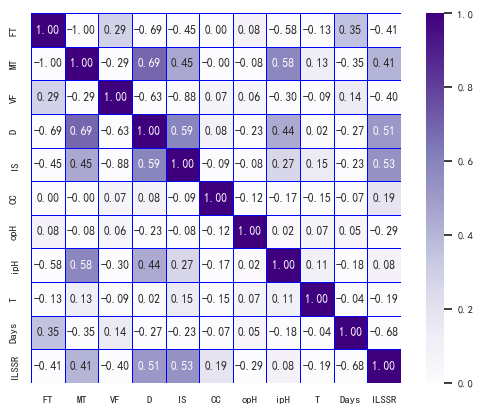

In [4]:
import seaborn as sns
X = data[["FT", "MT", "VF", "D", "IS", "CC", "opH", "ipH", "T", "Days"]]
Y = data["ILSSR"]
cor = data.corr(method="pearson")
print(cor)
rc = {'font.sans-serif': 'SimHei','axes.unicode_minus': False}
sns.set(font_scale=0.7,rc=rc) 
sns.heatmap(cor,
            annot=True,  # 显示相关系数的数据
            center=0.5,  # 居中
            fmt='.2f',  # 只显示两位小数
            linewidth=0.5,  # 设置每个单元格的距离
            linecolor='blue',  # 设置间距线的颜色
            vmin=0, vmax=1,  # 设置数值最小值和最大值
            xticklabels=True, yticklabels=True,  # 显示x轴和y轴
            square=True,  # 每个方格都是正方形
            cbar=True,  # 绘制颜色条
            cmap='Purples',  # 设置热力图颜色
            )
plt.ion()
plt.style.use("default")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [5]:
RF = ensemble.RandomForestRegressor(random_state=123)
R2=[]
index=[]
for i in range(1,1000,1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=i)
    RF.fit(X_train, Y_train)
    R2.append(RF.score(X_test, Y_test))

In [6]:
print(max(R2))
print(R2.index(max(R2))+1)
print("------------------------------")
R2_maxlist= sorted(R2, reverse=True)[0:10]
bestseeds = []
for i in R2_maxlist:
    bestseeds.append(R2.index(i)+1)
print("在本台Laptop上最佳的前10个测试R2及其对应的随机数种子:")
print(R2_maxlist)
print(bestseeds)
bestseed=R2.index(i)+1

0.9759688479097668
19
------------------------------
在本台Laptop上最佳的前10个测试R2及其对应的随机数种子:
[0.9759688479097668, 0.973307252214381, 0.972700998322309, 0.9716973611903357, 0.9712223709748485, 0.9706558609675822, 0.9704297739352347, 0.9703248363149081, 0.9696947550849445, 0.9695694373003598]
[19, 522, 602, 781, 84, 906, 199, 992, 345, 225]


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=bestseed)
modelRF=ensemble.RandomForestRegressor(random_state=123)
modelRF.fit(X_train, Y_train)
print("训练R2:", modelRF.score(X_train, Y_train))
print("测试R2:", modelRF.score(X_test, Y_test))

训练R2: 0.9902523377993201
测试R2: 0.9695694373003598


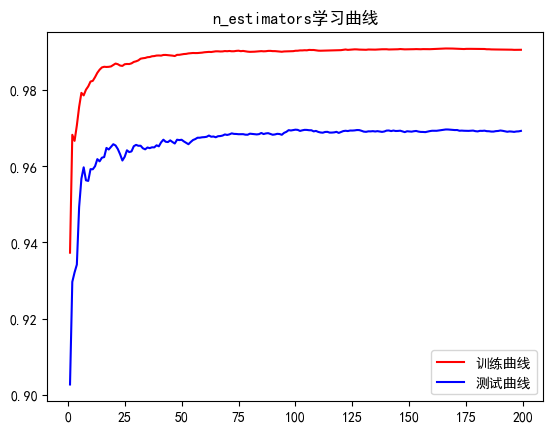

n_estimators调整后最佳测试R方: 0.9696210939838148
最佳n_estimators数量: 166


In [8]:
p1 = []
p2 = []
for i in np.arange(1, 200, 1):
    RF1 = ensemble.RandomForestRegressor(n_estimators=i, random_state=123)
    RF1.fit(X_train, Y_train)
    p1.append(RF1.score(X_train, Y_train))
    p2.append(RF1.score(X_test, Y_test))
plt.title("n_estimators学习曲线")
plt.plot(np.arange(1, 200, 1), p1, c="red", label="训练曲线")
plt.plot(np.arange(1, 200, 1), p2, c="blue", label="测试曲线")
plt.legend()
plt.show()
best_n_estimators = p2.index(max(p2)) + 1
print("n_estimators调整后最佳测试R方:", max(p2))
print("最佳n_estimators数量:", best_n_estimators)

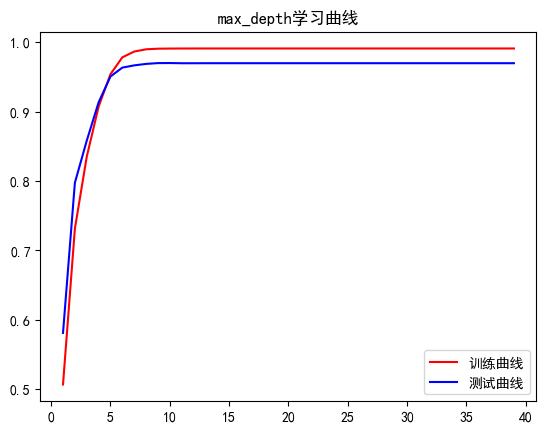

max_depth调整后最佳测试R方: 0.9698646479433398
最佳max_depth数量: 10


In [9]:
p1 = []
p2 = []
for i in np.arange(1, 40, 1):
    modelRF = ensemble.RandomForestRegressor(n_estimators=best_n_estimators, max_depth=i, random_state=123)
    modelRF.fit(X_train, Y_train)
    p1.append(modelRF.score(X_train, Y_train))
    p2.append(modelRF.score(X_test, Y_test))
plt.title("max_depth学习曲线")
plt.plot(np.arange(1, 40, 1), p1, c="red", label="训练曲线")
plt.plot(np.arange(1, 40, 1), p2, c="blue", label="测试曲线")
plt.legend()
plt.show()
best_max_depth = np.argmax(p2)+1
print("max_depth调整后最佳测试R方:", max(p2))
print("最佳max_depth数量:", best_max_depth)

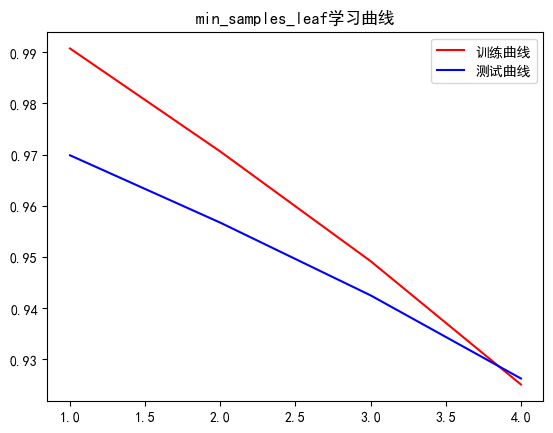

best_min_samples_leaf调整后最佳测试R方: 0.9698646479433398
最佳min_samples_leaf数量: 1


In [10]:
p1 = []
p2 = []
for i in np.arange(1, 5, 1):
    modelRF = ensemble.RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=123, min_samples_leaf=i)
    modelRF.fit(X_train, Y_train)
    p1.append(modelRF.score(X_train, Y_train))
    p2.append(modelRF.score(X_test, Y_test))
plt.title("min_samples_leaf学习曲线")
plt.plot(np.arange(1, 5, 1), p1, c="red", label="训练曲线")
plt.plot(np.arange(1, 5, 1), p2, c="blue", label="测试曲线")
plt.legend()
plt.show()
best_min_samples_leaf=np.argmax(p2)+1
print("best_min_samples_leaf调整后最佳测试R方:", max(p2))
print("最佳min_samples_leaf数量:", best_min_samples_leaf)

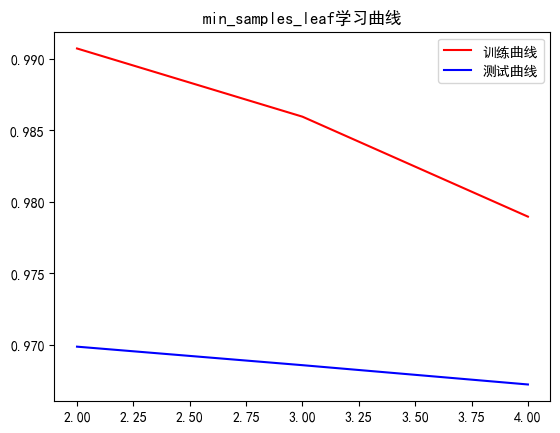

best_samples_split调整后最佳测试R方: 0.9698646479433398
最佳best_min_samples_split数量: 1


In [11]:
p1 = []
p2 = []
for i in np.arange(2, 5, 1):
    modelRF = ensemble.RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=i, random_state=123)
    modelRF.fit(X_train, Y_train)
    p1.append(modelRF.score(X_train, Y_train))
    p2.append(modelRF.score(X_test, Y_test))
plt.title("min_samples_leaf学习曲线")
plt.plot(np.arange(2, 5, 1), p1, c="red", label="训练曲线")
plt.plot(np.arange(2, 5, 1), p2, c="blue", label="测试曲线")
plt.legend()
plt.show()
best_min_samples_split=np.argmax(p2)+1
print("best_samples_split调整后最佳测试R方:", max(p2))
print("最佳best_min_samples_split数量:", best_min_samples_split)

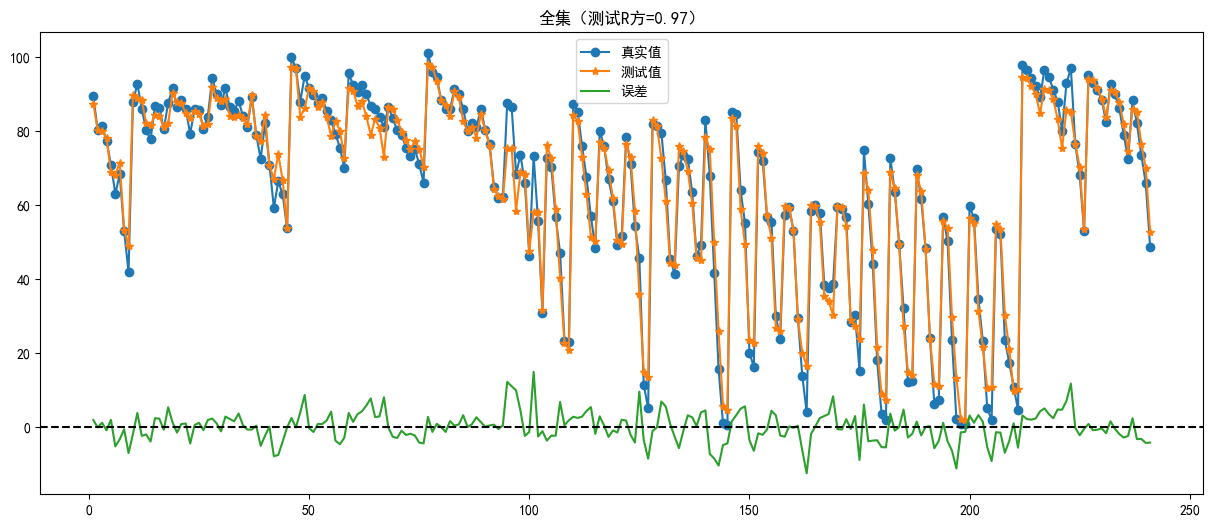

In [12]:
modelRF = ensemble.RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=i, random_state=123)
modelRF.fit(X_train, Y_train)
plt.style.use("default")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
sequence = np.arange(1, 242, 1)
plt.figure(figsize=(15, 6))
plt.plot(sequence, Y, marker="o", label="真实值")
plt.plot(sequence, modelRF.predict(X), marker="*", label="测试值")
plt.plot(sequence, np.array(Y) - np.array(modelRF.predict(X)), label="误差")
plt.axhline(y=0, linestyle="--", color="black")
plt.title("全集（测试R方=%0.2f）"%(modelRF.score(X_test, Y_test)))
plt.legend()
plt.show()

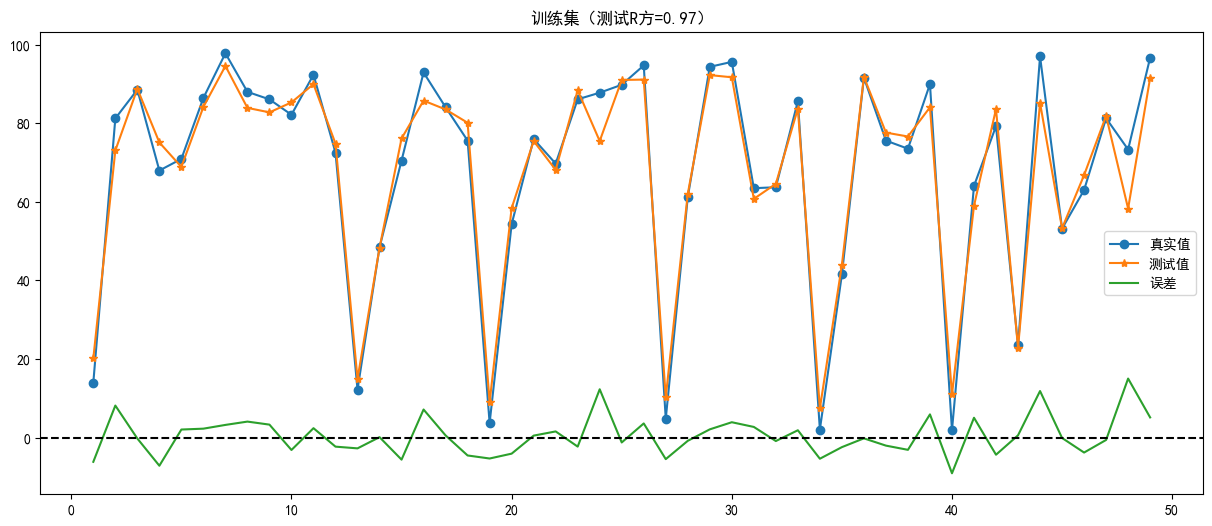

In [13]:
modelRF = ensemble.RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=i, random_state=123)
modelRF.fit(X_train, Y_train)
plt.style.use("default")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
sequence = np.arange(1, 50, 1)
plt.figure(figsize=(15, 6))
plt.plot(sequence, Y_test, marker="o", label="真实值")
plt.plot(sequence, modelRF.predict(X_test), marker="*", label="测试值")
plt.plot(sequence, np.array(Y_test) - np.array(modelRF.predict(X_test)), label="误差")
plt.axhline(y=0, linestyle="--", color="black")
plt.title("训练集（测试R方=%0.2f）"%(modelRF.score(X_test, Y_test)))
plt.legend()
plt.show()

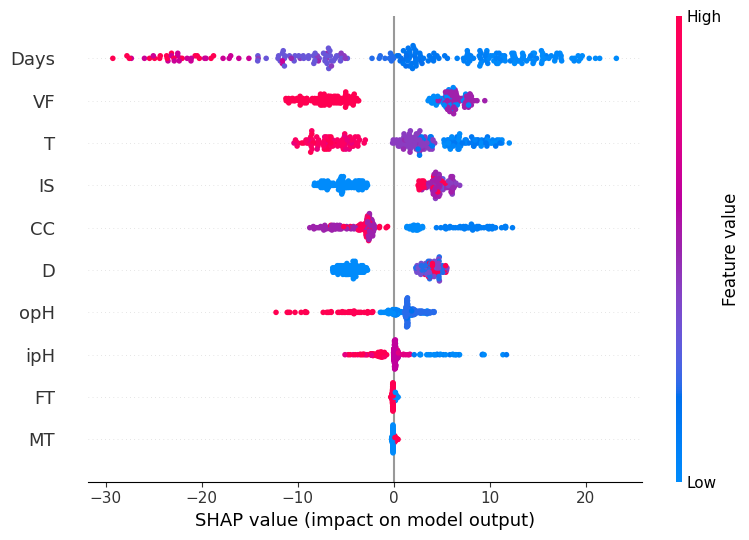

In [14]:
import shap
RF = ensemble.RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf, min_samples_split=2, random_state=123)
RF.fit(X_train, Y_train)
explainer = shap.TreeExplainer(RF, X)
shap_values = explainer.shap_values(X)
plt.style.use("default")
shap.summary_plot(shap_values, X, feature_names=["FT", "MT", "VF", "D", "IS", "CC", "opH", "ipH", "T", "Days"])

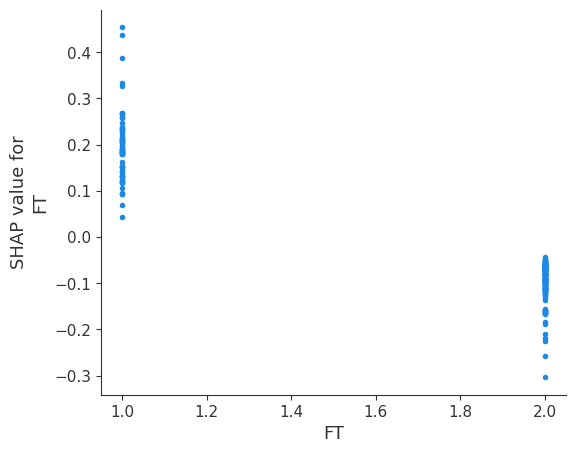

In [15]:
shap.dependence_plot("FT",shap_values,X,interaction_index=None,show=True)

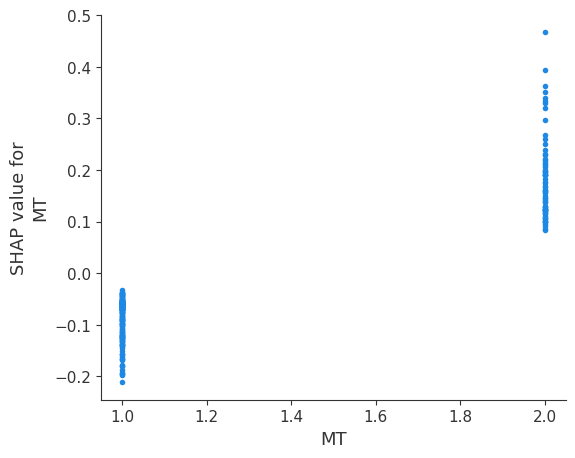

In [16]:
shap.dependence_plot("MT",shap_values,X,interaction_index=None,show=True)

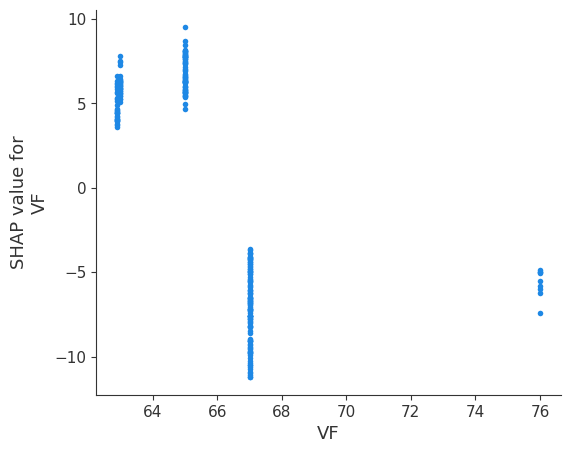

In [17]:
shap.dependence_plot("VF",shap_values,X,interaction_index=None,show=True)

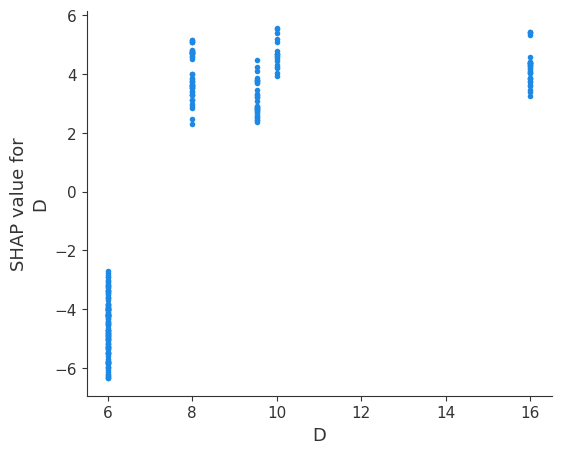

In [18]:
shap.dependence_plot("D",shap_values,X,interaction_index=None,show=True)

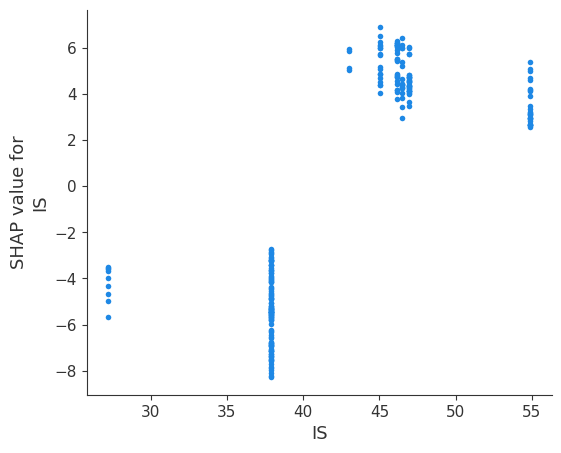

In [19]:
shap.dependence_plot("IS",shap_values,X,interaction_index=None,show=True)

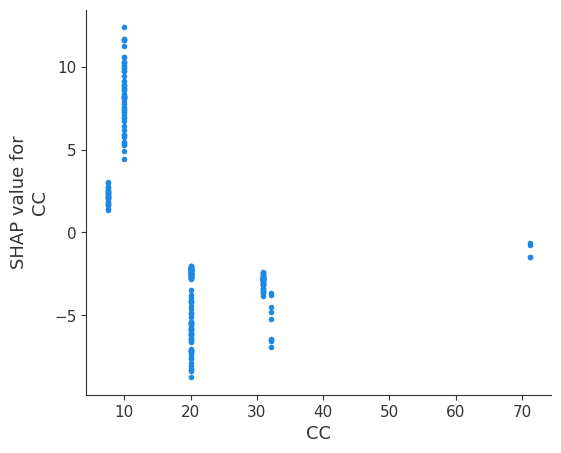

In [20]:
shap.dependence_plot("CC",shap_values,X,interaction_index=None,show=True)

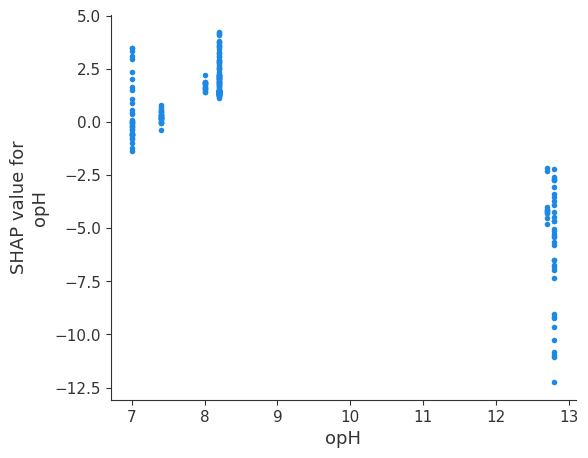

In [21]:
shap.dependence_plot("opH",shap_values,X,interaction_index=None,show=True)

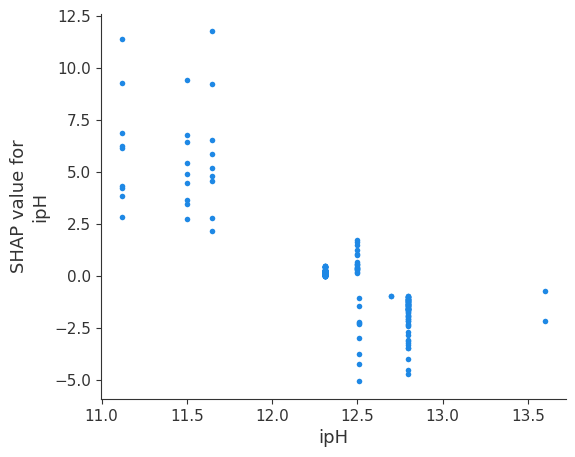

In [22]:
shap.dependence_plot("ipH",shap_values,X,interaction_index=None,show=True)

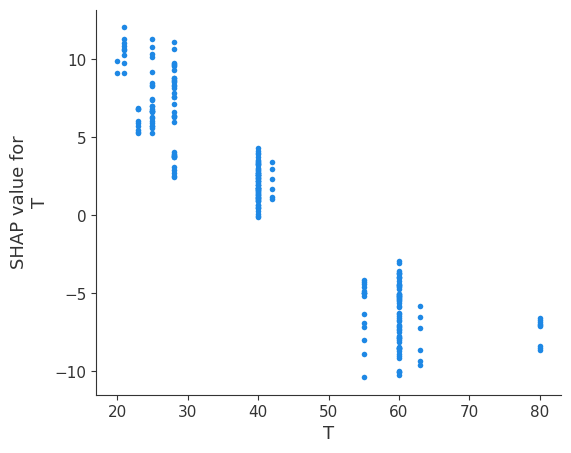

In [23]:
shap.dependence_plot("T",shap_values,X,interaction_index=None,show=True)

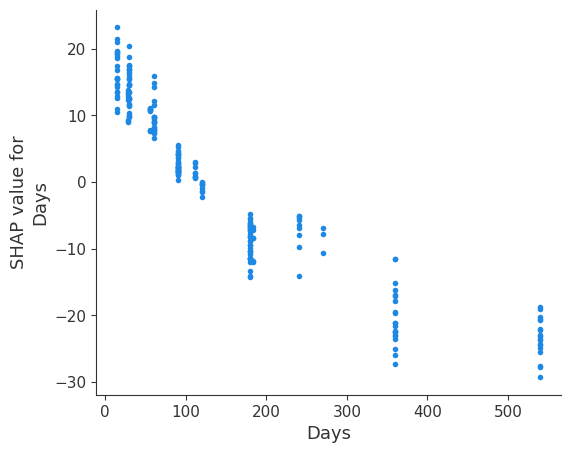

In [24]:
shap.dependence_plot("Days",shap_values,X,interaction_index=None,show=True)

In [25]:
print("RF最优模型总体效果")
print("----------------------------------------------------------------------------------------------------------------------------------------------------")
Y_list = Y_test.tolist()
Y_predictlist = RF.predict(X_test).tolist()
print("训练R2:", RF.score(X_train, Y_train))
print("测试R2:", RF.score(X_test, Y_test))
print("SSE:", SSE(Y_list, Y_predictlist))
print("MSE:", MSE(Y_list, Y_predictlist))
print("RMSE:", RMSE(Y_list, Y_predictlist))
print("MAE:", MAE(Y_list, Y_predictlist))
print("-------------------------------------------------------------------------------------------------------------------------------------------------------")

RF最优模型总体效果
----------------------------------------------------------------------------------------------------------------------------------------------------
训练R2: 0.9907250807130362
测试R2: 0.9698646479433398
SSE: 1134.8754956858852
MSE: 23.16072440175276
RMSE: 4.812559028391523
MAE: 3.783359357815665
-------------------------------------------------------------------------------------------------------------------------------------------------------


In [26]:
Y_tr_list=Y_train.tolist()
Y_tr_predictlist=RF.predict(X_train).tolist()
print("SSE:", SSE(Y_tr_list, Y_tr_predictlist))
print("MSE:", MSE(Y_tr_list, Y_tr_predictlist))
print("RMSE:", RMSE(Y_tr_list, Y_tr_predictlist))
print("MAE:", MAE(Y_tr_list, Y_tr_predictlist))

SSE: 1212.1714573749628
MSE: 6.313393007161264
RMSE: 2.512646614062802
MAE: 1.9018148595288


In [26]:
print(shap_values)
print(type(shap_values))

[[ -0.09524992  -0.08529547   5.95500058 ...  -1.05959398   8.26863469
    2.73175801]
 [ -0.16735216  -0.12262566   7.01184864 ...  -2.26797678  10.13220914
   -7.30319212]
 [ -0.15545091  -0.10826537   6.9808178  ...  -2.30771736  11.28067621
   -7.94512559]
 ...
 [  0.23293393   0.1582613    5.27402106 ...  -2.15802174  -6.48336492
    9.80951043]
 [  0.10698115   0.12180216   6.63041272 ...  -2.38767258  -7.81227809
    1.52350486]
 [  0.09576329   0.12214955   6.40977505 ...  -3.48123553  -9.97651319
  -12.04581453]]
<class 'numpy.ndarray'>


In [27]:
shap_df = pd.DataFrame(shap_values)
print(shap_df)
shap_df.to_excel("E:/Comparisonwork/SHAP_VALUE/SHAPVALUE_ILSSwithConcrete_alldata.xlsx", index=False)

            0         1         2         3         4         5         6  \
0   -0.095250 -0.085295  5.955001  3.397944  4.410292 -2.602865  1.510940   
1   -0.167352 -0.122626  7.011849  3.989969  5.534101 -3.129736  1.429067   
2   -0.155451 -0.108265  6.980818  3.990878  5.428770 -3.153493  1.417973   
3   -0.127858 -0.109823  5.682606  3.119490  4.079876 -3.179208  1.291339   
4   -0.210669 -0.144525  6.526165  3.634564  4.846592 -3.642597  1.308602   
..        ...       ...       ...       ...       ...       ...       ...   
236  0.219067  0.138905  5.816085  3.777981  4.259714 -2.427665  0.235001   
237  0.236734  0.149744  5.895661  3.874390  4.323807 -2.400578  0.213406   
238  0.232934  0.158261  5.274021  3.396398  3.649937 -2.438670  0.186811   
239  0.106981  0.121802  6.630413  3.605351  4.562166 -2.743513 -0.051344   
240  0.095763  0.122150  6.409775  3.854573  4.830055 -2.839310  0.122328   

            7          8          9  
0   -1.059594   8.268635   2.731758  

In [30]:
print(type(X_train))
X_train.to_excel("E:/Comparisonwork/Model_Performance/X_train.xlsx", index=False)
X_test.to_excel("E:/Comparisonwork/Model_Performance/X_test.xlsx", index=False)
Y_train.to_excel("E:/Comparisonwork/Model_Performance/Y_train.xlsx", index=False)
Y_test.to_excel("E:/Comparisonwork/Model_Performance/Y_test.xlsx", index=False)
Y_trainprediction=RF.predict(X_train)
Y_testprediction=RF.predict(X_test)
Y_trainprediction = pd.DataFrame(Y_trainprediction)
Y_testprediction = pd.DataFrame(Y_testprediction)
Y_trainprediction.to_excel("E:/Comparisonwork/Model_Performance/Y_trainprediction.xlsx", index=False)
Y_testprediction.to_excel("E:/Comparisonwork/Model_Performance/Y_testprediction.xlsx", index=False)
Y_all=RF.predict(X)
Y_all = pd.DataFrame(Y_all)
Y_all.to_excel("E:/Comparisonwork/Model_Performance/Y_all.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
